## Project 3: Clustering - COVID 19 cases

#### Name: Mansi Joshi
Student Id: 300317856

The purpose of this project is to apply cluster analysis to country-level COVID-19 data 
to examine the incidence of COVID-19. This will help us uncover country groups as far as 
COVID-19 crisis is concerned as serve a baseline for policy guidelines at the country level.
(When ground truth is unknown, go for clustering)

1. Import the data as a dataframe for analysis

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df = pd.read_csv("World_Covid19_cases.csv", sep = ',')
df.head()

,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,1,USA,"3,893,949","60,678","143,263",386.0,"1,802,110","1,948,576","16,616","11,761",433,"48,324,182","145,951","331,097,557"
1,2,Brazil,"2,098,389","23,143","79,488",671.0,"1,371,229","647,672","8,318","9,869",374,"4,911,063","23,096","212,632,374"
2,3,India,"1,118,107","40,243","27,503",675.0,"700,399","390,205","8,944",810,20,"13,791,869","9,989","1,380,641,231"
3,4,Russia,"771,546","6,109","12,342",95.0,"550,344","208,860","2,300","5,287",85,"24,991,740","171,249","145,937,686"
4,5,South Africa,"364,328","13,449","5,033",85.0,"191,059","168,236",539,"6,139",85,"2,471,747","41,652","59,342,751"


2. Perform the necessary preprocessing of the data to include:

In [15]:
#a) Select ONLY the following columns for further processing: 
#Country, Total Cases, Total Deaths, Total Recovered, Active Cases, Critical Cases, Total Tests, Population.

cols = ['Country', 'Total Cases', 'Total Deaths', 'Total Recovered', 
        'Active Cases', 'Critical Cases', 'Total Tests', 'Population']
countryCol = df['Country']
df1 = df[cols]

#b) Remove the comma (i.e., “,”) number separater from numeric columns.

df1['Total Cases'] = df1['Total Cases'].str.replace(',', '')
df1['Total Deaths'] = df1['Total Deaths'].str.replace(',', '')
df1['Total Recovered'] = df1['Total Recovered'].str.replace(',', '')
df1['Active Cases'] = df1['Active Cases'].str.replace(',', '')
df1['Critical Cases'] = df1['Critical Cases'].str.replace(',', '')
df1['Total Tests'] = df1['Total Tests'].str.replace(',', '')
df1['Population'] = df1['Population'].str.replace(',', '')
df1.head()

C:\Users\joshi\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joshi\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\joshi\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,3893949,143263,1802110,1948576,16616,48324182,331097557
1,Brazil,2098389,79488,1371229,647672,8318,4911063,212632374
2,India,1118107,27503,700399,390205,8944,13791869,1380641231
3,Russia,771546,12342,550344,208860,2300,24991740,145937686
4,South Africa,364328,5033,191059,168236,539,2471747,59342751


In [16]:
#c) Temporarily drop the Country column and convert the other columns to numeric values 
#(note: use the errors='coerce' option to coerce missing values to be converted to np.nan).

df2 = df1.drop(['Country'], axis = 1)

df2 = df2.apply(pd.to_numeric, errors = 'coerce')

df2.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08
1,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08
2,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09
3,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08
4,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07


In [17]:
#d) Re-append the Country column to the data frame.
df2['Country'] = countryCol
df2.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Country
0,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,USA
1,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,Brazil
2,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,India
3,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,Russia
4,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,South Africa


In [18]:
#e) Use the fillna() function to fill in missing values in the following two columns: 
#Total Deaths and Critical Cases. Fill in the missing values using 0 (i.e., Zero)
df2['Total Deaths'].fillna(0,inplace=True)
df2['Critical Cases'].fillna(0,inplace=True)
df2.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Country
0,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,USA
1,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,Brazil
2,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,India
3,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,Russia
4,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,South Africa


In [19]:
#f) Thereafter, check whether there are any columns with missing values and use dropna() 
#function to drop rows with missing values.
df2.isnull().sum()   #check first
df2 = df2.dropna()   #drop na values
df2.isnull().sum()   #check again

Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Critical Cases     0
Total Tests        0
Population         0
Country            0
dtype: int64

In [20]:
#g) Add/Append the following computed column to the data frame: Pop_ml = Population/1000000 
#(i.e., convert country population numbers to millions by dividing by 1 million).

df2['Pop_ml'] = df2['Population'] / 1000000
df2.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Country,Pop_ml
0,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,USA,331.097557
1,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,Brazil,212.632374
2,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,India,1380.641231
3,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,Russia,145.937686
4,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,South Africa,59.342751


In [21]:
#h) Thereafter, add/append the following computed columns to the data frame:
df2['Mortality_rate'] = df2['Total Deaths'] / df2['Total Cases']
df2['Cases_per_ml'] = df2['Total Cases'] / df2['Pop_ml']
df2['Deaths_per_ml'] = df2['Total Deaths'] / df2['Pop_ml']
df2['Recovered_per_ml'] = df2['Total Recovered'] / df2['Pop_ml']
df2['Active_per_ml'] = df2['Active Cases'] / df2['Pop_ml']
df2['Critical_per_ml'] = df2['Critical Cases'] / df2['Pop_ml']
df2['Tests_per_ml'] = df2['Total Tests'] / df2['Pop_ml']
df2.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Country,Pop_ml,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,USA,331.097557,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,Brazil,212.632374,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,India,1380.641231,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,Russia,145.937686,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,South Africa,59.342751,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [22]:
#i) Select the following columns for subsequent analysis:
#Country, Mortality_rate, Cases_per_ml, Deaths_per_ml, Recovered_per_ml, Active_per_ml, Critical_per_ml, Tests_per_ml.
#Hint:If you have implemented all the steps correctly, your data frame after this step should be of the shape (94, 8).

df_final = df2[['Country', 'Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 
         'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']]
df_final.head()
df_final.shape

(194, 8)

In [23]:
#j) For now, drop the Country column (you’ll need later); so keep your data frame from step i) intact!
df4 = df_final.drop(['Country'], axis = 1)
df4.head()

,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [24]:
#k) After dropping the country column, scale the data using StandardSCaler.
scaler = StandardScaler()
scale_df = df4.copy()
scale_df[['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']] = scaler.fit_transform(scale_df[['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']])
scale_df.head()

,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,0.140172,1.961777,2.138489,0.880126,4.299014,2.794194,0.667439
1,0.169068,1.551085,1.778281,1.133636,1.952318,2.076678,-0.359577
2,-0.183282,-0.415172,-0.387439,-0.363635,-0.331656,-0.039862,-0.469146
3,-0.411452,0.556579,0.008182,0.458843,0.617635,0.562011,0.878918
4,-0.469333,0.741634,0.009664,0.319864,1.777936,0.129033,-0.204460


3. With scaled data, use scipy.cluster.hierarchy to determine the optimal number of clusters.

In [25]:
def show_dendrogram(data):                      #function definition for dendogram
    plt.figure(figsize=(10, 7))
    plt.title("COVID 19 cases details - Dendrogram")
    dend = shc.dendrogram(shc.linkage(data, method='ward'))

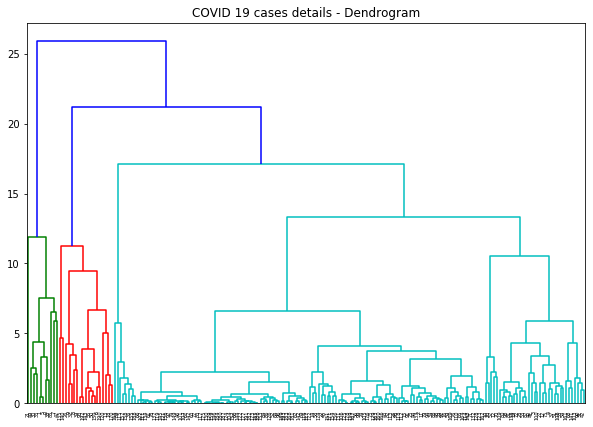

In [26]:
show_dendrogram(scale_df)                       #generate the dendrogram

We get 3 clusters - based on the 3 colors

4. Repeat step 3 using the Elbow method (i.e., scree plot)

In [27]:
#function definition - compute withinness sum of squares (wss)
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [28]:
wcss1 = calculate_wcss(scale_df)         #compute wss

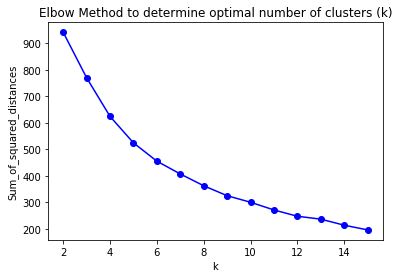

In [44]:
#scree plot (elbow method)
plt.plot(range(2,16), wcss1, '-bo')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method to determine optimal number of clusters (k)')
plt.show()

5. Using the optimal number of clusters determined in 3) above (more conclusive than the Elbow method), implement cluster analysis using k-means and hierarchical (i.e., AgglomarativeClustering) techniques.

k-means approach

In [30]:
#run kmeans with number of clusters obtained earlier
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scale_df)

print(clusters)

[1 1 0 0 0 1 2 1 2 2 0 0 1 2 0 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 1 0 2 1 0 0 0
 0 1 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0]


In [31]:
#generate cluster centers
centers = kmeans.cluster_centers_
print(centers)

[[-0.25133228 -0.27657993 -0.32529548 -0.23733462 -0.22655202 -0.20614269
  -0.05624437]
 [-0.26796001  2.65025998  1.19688137  2.44965456  1.90005033  2.28756462
   0.569292  ]
 [ 2.32802975  0.23678361  1.79442398  0.06466948  0.40776678 -0.07003359
   0.02419572]]


In [32]:
#save the cluster centers to a dataframe

df_cols = ['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml',
           'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']

clusters_df = pd.DataFrame(centers)
clusters_df.columns = df_cols
print(clusters_df)

   Mortality_rate  Cases_per_ml  Deaths_per_ml  Recovered_per_ml  \
0       -0.251332     -0.276580      -0.325295         -0.237335   
1       -0.267960      2.650260       1.196881          2.449655   
2        2.328030      0.236784       1.794424          0.064669   

   Active_per_ml  Critical_per_ml  Tests_per_ml  
0      -0.226552        -0.206143     -0.056244  
1       1.900050         2.287565      0.569292  
2       0.407767        -0.070034      0.024196  


Hierarchical technique (agg)

In [33]:
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') #instance of AgglomerativeClustering

clusters_ac = hclust.fit_predict(scale_df)          #fit data, generate cluster labels (i.e. membership)

print(clusters_ac)

[1 1 0 0 0 1 2 1 2 2 0 0 0 2 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 0 1 0 2 1 0 0 0
 0 1 2 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0]


6. Compare the strenth of cluster solutions of the two approaches using the following metrics: silhouette_score, calinski_harabasz_score, davies_bouldin_score.

Silhoutte coefficient
The higher, the better (+ve range)

In [34]:
#kmeans
silhouette_score(scale_df, clusters, metric='euclidean')

0.5310315622336387

In [35]:
#Hierarchical clustering
silhouette_score(scale_df, clusters_ac, metric='euclidean')

0.5346570883978448

Calinski_harabasz_score
one with highest score is better - no threshold or decision point, just a comparative scale

In [36]:
#kmeans
calinski_harabasz_score(scale_df, clusters)

72.88634114982202

In [37]:
#Hierachical clustering
calinski_harabasz_score(scale_df, clusters_ac)

67.16859942675217

Davies_bouldin_score
The lower the value, the better. Values closer to zero --> better partition

In [38]:
#kmeans clustering
davies_bouldin_score(scale_df, clusters)

1.1693915881286654

In [39]:
#Hierarchical clustering
davies_bouldin_score(scale_df, clusters_ac)

1.0979807302454392

7. Based on the metrics in 6) above, select the better technique for further analysis.
--> Hierarchical is better here (best out of 3 metrics results)

8. Based on the results of the chosen technique, append cluster membership variable/feature to the data frame you obtained in step 2. i) above (i.e., the data frame containing country column).
Save the data frame to file as a CSV file.

In [40]:
#append cluster labels (membership) to the final dataframe, save it to csv
df_final['Clust_mem'] = clusters_ac

df_final.tail()

C:\Users\joshi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
205,Greenland,0.000000,228.974020,0.000000,228.974020,0.000000,0.0,91448.701013,0
206,Montserrat,0.083333,2403.846154,200.320513,2003.205128,200.320513,0.0,12219.551282,2
209,Caribbean Netherlands,0.000000,381.170192,0.000000,266.819135,114.351058,0.0,16161.616162,0
210,British Virgin Islands,0.125000,264.541516,33.067690,231.473827,0.000000,0.0,14516.715717,2
211,St. Barth,0.000000,607.348922,0.000000,607.348922,0.000000,0.0,90798.663832,0


In [41]:
df_final.to_csv("Final Dataframe - Covid19.csv")

9. Generate a data frame of cluster centers (means) and also save it to a CSV file. Note: even though we are using scaled data to obtain cluster solution, we append cluster membershiop feature and generate cluster centers using unscaled data for easy interpretation.

In [42]:
#compute cluster centers - for each cluster, hence using groupby, group for each cluster
clust_cent_hc = pd.DataFrame(df_final.groupby('Clust_mem').mean().round(4))
print(clust_cent_hc)

           Mortality_rate  Cases_per_ml  Deaths_per_ml  Recovered_per_ml  \
Clust_mem                                                                  
0                  0.0224     1562.9449        33.7694         1087.7581   
1                  0.0181    16549.0857       229.6818        12688.9369   
2                  0.1175     4727.3580       425.3985         3178.1901   

           Active_per_ml  Critical_per_ml  Tests_per_ml  
Clust_mem                                                
0               441.4174           5.2403    62077.7402  
1              3630.4671          43.3510   107780.1900  
2              1070.9101           2.0925    76792.5291  


In [43]:
#save the cluster centers dataframe to file
clust_cent_hc.to_csv("cluster_centers.csv")